In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cross_decomposition import CCA
from sklearn.preprocessing import StandardScaler
from scipy import stats
from scikit_posthocs import posthoc_dunn

In [3]:

# Charger le fichier pour examiner sa structure
file_path = 'nutrimouse_dataset.csv'
data = pd.read_csv(file_path)

# Examiner les premières lignes et les informations générales du fichier
data_info = data.info()
data_head = data.head()
data_description = data.describe(include='all').T

data_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Columns: 143 entries, gene.X36b4 to genotype
dtypes: float64(141), object(2)
memory usage: 44.8+ KB


In [4]:
data_head

,gene.X36b4,gene.ACAT1,gene.ACAT2,gene.ACBP,gene.ACC1,gene.ACC2,gene.ACOTH,gene.ADISP,gene.ADSS1,gene.ALDH3,...,lipid.C20.4n.6,lipid.C22.4n.6,lipid.C22.5n.6,lipid.C18.3n.3,lipid.C20.3n.3,lipid.C20.5n.3,lipid.C22.5n.3,lipid.C22.6n.3,diet,genotype
0,-0.42,-0.65,-0.84,-0.34,-1.29,-1.13,-0.93,-0.98,-1.19,-0.68,...,3.07,0.00,0.00,5.97,0.37,8.62,1.75,10.39,lin,wt
1,-0.44,-0.68,-0.91,-0.32,-1.23,-1.06,-0.99,-0.97,-1.00,-0.62,...,15.34,0.58,2.10,0.00,0.00,0.00,0.48,2.61,sun,wt
2,-0.48,-0.74,-1.10,-0.46,-1.30,-1.09,-1.06,-1.08,-1.18,-0.75,...,13.27,0.54,1.77,0.00,0.00,0.00,0.22,2.51,sun,wt
3,-0.45,-0.69,-0.65,-0.41,-1.26,-1.09,-0.93,-1.02,-1.07,-0.71,...,3.92,0.00,0.00,0.49,0.00,2.99,1.04,14.99,fish,wt
4,-0.42,-0.71,-0.54,-0.38,-1.21,-0.89,-1.00,-0.95,-1.08,-0.76,...,11.85,0.32,0.44,0.42,0.00,0.30,0.35,6.69,ref,wt


In [5]:
data_description

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
gene.X36b4,40.0,NaN,NaN,NaN,-0.45525,0.067177,-0.58,-0.5025,-0.46,-0.42,-0.3
gene.ACAT1,40.0,NaN,NaN,NaN,-0.65525,0.053253,-0.75,-0.69,-0.66,-0.62,-0.52
gene.ACAT2,40.0,NaN,NaN,NaN,-0.76675,0.173033,-1.1,-0.88,-0.795,-0.645,-0.39
gene.ACBP,40.0,NaN,NaN,NaN,-0.43375,0.099426,-0.66,-0.5025,-0.425,-0.355,-0.24
gene.ACC1,40.0,NaN,NaN,NaN,-1.2585,0.067427,-1.44,-1.3,-1.26,-1.22,-1.07
...,...,...,...,...,...,...,...,...,...,...,...
lipid.C20.5n.3,40.0,NaN,NaN,NaN,1.7895,2.590009,0.0,0.07,0.25,2.84,9.48
lipid.C22.5n.3,40.0,NaN,NaN,NaN,0.87175,0.855983,0.0,0.1275,0.44,1.675,2.58
lipid.C22.6n.3,40.0,NaN,NaN,NaN,5.914,5.334871,0.28,1.8525,3.355,10.3925,17.35
diet,40,5,lin,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data_gene = data.iloc[:, 105:119]
data_gene.head(10)

,gene.apoA.I,gene.apoB,gene.apoC3,gene.apoE,gene.c.fos,gene.cHMGCoAS,gene.cMOAT,gene.eif2g,gene.hABC1,gene.i.BABP,gene.i.BAT,gene.i.FABP,gene.i.NOS,gene.mABC1
0,0.76,-0.12,-0.49,1.08,-1.15,-1.15,-0.78,-1.23,-1.16,-0.78,-1.65,-1.14,-1.24,-0.85
1,0.86,-0.13,-0.35,1.12,-1.08,-0.95,-0.73,-1.02,-1.11,-0.73,-1.67,-1.03,-1.20,-0.84
2,0.82,-0.19,-0.42,1.04,-1.18,-0.93,-0.89,-1.14,-1.25,-0.89,-1.89,-1.16,-1.35,-0.96
3,0.71,-0.25,-0.39,1.05,-1.11,-1.10,-0.93,-1.10,-1.17,-0.82,-1.70,-1.17,-1.25,-0.87
4,0.83,-0.17,-0.33,1.08,-1.08,-0.94,-0.84,-1.10,-1.14,-0.71,-1.68,-1.15,-1.20,-0.82
5,0.90,-0.17,-0.30,1.12,-1.06,-0.83,-0.81,-1.05,-1.08,-0.76,-1.68,-1.08,-1.16,-0.81
6,0.72,-0.13,-0.40,1.04,-1.06,-0.91,-0.78,-0.97,-1.06,-0.86,-1.64,-0.99,-1.22,-0.84
7,0.65,-0.23,-0.31,1.02,-1.16,-1.05,-0.91,-1.14,-1.19,-0.79,-1.72,-1.27,-1.39,-0.82
8,0.82,-0.04,-0.27,1.17,-1.07,-1.02,-0.69,-1.05,-1.13,-0.73,-1.77,-1.15,-1.24,-0.83
9,0.81,-0.15,-0.34,0.95,-1.06,-0.78,-0.79,-0.97,-1.09,-0.81,-1.73,-0.93,-1.22,-0.87


In [20]:
data_gene.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
gene.apoA.I,40.0,0.72950,0.098083,0.54,0.6575,0.720,0.8100,0.92
gene.apoB,40.0,-0.16750,0.059085,-0.27,-0.2000,-0.170,-0.1450,0.01
gene.apoC3,40.0,-0.34075,0.063665,-0.49,-0.3900,-0.340,-0.3000,-0.18
gene.apoE,40.0,1.02825,0.071320,0.86,0.9800,1.040,1.0700,1.18
gene.c.fos,40.0,-1.10525,0.058177,-1.22,-1.1500,-1.110,-1.0600,-0.98
gene.cHMGCoAS,40.0,-1.01375,0.119929,-1.24,-1.1025,-1.030,-0.9100,-0.78
gene.cMOAT,40.0,-0.84850,0.079180,-1.02,-0.8950,-0.870,-0.7875,-0.69
gene.eif2g,40.0,-1.05800,0.077367,-1.23,-1.1000,-1.055,-1.0200,-0.84
gene.hABC1,40.0,-1.13825,0.058436,-1.25,-1.1725,-1.135,-1.0975,-0.98
gene.i.BABP,40.0,-0.79350,0.057179,-0.89,-0.8325,-0.800,-0.7475,-0.67


In [21]:
data_gene.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gene.apoA.I    40 non-null     float64
 1   gene.apoB      40 non-null     float64
 2   gene.apoC3     40 non-null     float64
 3   gene.apoE      40 non-null     float64
 4   gene.c.fos     40 non-null     float64
 5   gene.cHMGCoAS  40 non-null     float64
 6   gene.cMOAT     40 non-null     float64
 7   gene.eif2g     40 non-null     float64
 8   gene.hABC1     40 non-null     float64
 9   gene.i.BABP    40 non-null     float64
 10  gene.i.BAT     40 non-null     float64
 11  gene.i.FABP    40 non-null     float64
 12  gene.i.NOS     40 non-null     float64
 13  gene.mABC1     40 non-null     float64
dtypes: float64(14)
memory usage: 4.5 KB


In [17]:
data_lipid = data.iloc[:, 120:130]
data_lipid.head(10)

,lipid.C14.0,lipid.C16.0,lipid.C18.0,lipid.C16.1n.9,lipid.C16.1n.7,lipid.C18.1n.9,lipid.C18.1n.7,lipid.C20.1n.9,lipid.C20.3n.9,lipid.C18.2n.6
0,0.34,26.45,10.22,0.35,3.10,16.98,2.41,0.26,0.00,8.93
1,0.38,24.04,9.93,0.55,2.54,20.07,3.92,0.23,0.00,14.98
2,0.36,23.70,8.96,0.55,2.65,22.89,3.96,0.26,0.19,16.06
3,0.22,25.48,8.14,0.49,2.82,21.92,2.52,0.00,0.00,13.89
4,0.37,24.80,9.63,0.46,2.85,21.38,2.96,0.30,0.27,14.55
5,1.70,26.04,6.59,0.66,7.26,28.23,8.99,0.36,2.89,3.47
6,0.35,25.94,9.68,0.36,3.60,17.62,2.15,0.25,0.00,8.73
7,0.34,28.63,9.95,0.29,3.27,17.02,1.99,0.31,0.00,7.75
8,0.22,25.34,8.81,0.44,2.36,18.39,1.81,0.00,0.00,15.65
9,1.38,28.49,5.63,0.90,7.01,36.68,8.85,0.21,2.03,2.31


In [18]:
data_lipid.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
lipid.C14.0,40.0,0.76300,0.800568,0.22,0.3500,0.420,0.6325,3.24
lipid.C16.0,40.0,23.02600,3.573031,14.65,20.6475,23.645,25.5425,29.72
lipid.C18.0,40.0,6.74700,2.640156,1.68,4.5400,6.500,9.0650,10.97
lipid.C16.1n.9,40.0,0.68700,0.284985,0.29,0.4575,0.645,0.8125,1.50
lipid.C16.1n.7,40.0,4.41875,2.984970,1.59,2.6325,3.300,4.9525,13.90
lipid.C18.1n.9,40.0,25.27325,7.339659,14.69,20.0450,23.020,32.4050,41.23
lipid.C18.1n.7,40.0,4.42600,3.375848,1.53,2.1400,3.075,4.6225,15.03
lipid.C20.1n.9,40.0,0.28400,0.139648,0.00,0.2450,0.285,0.3725,0.65
lipid.C20.3n.9,40.0,0.30675,0.721161,0.00,0.0000,0.000,0.2125,2.89
lipid.C18.2n.6,40.0,15.27750,8.760203,2.31,8.8800,14.865,21.2050,40.02


In [22]:
data_lipid.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   lipid.C14.0     40 non-null     float64
 1   lipid.C16.0     40 non-null     float64
 2   lipid.C18.0     40 non-null     float64
 3   lipid.C16.1n.9  40 non-null     float64
 4   lipid.C16.1n.7  40 non-null     float64
 5   lipid.C18.1n.9  40 non-null     float64
 6   lipid.C18.1n.7  40 non-null     float64
 7   lipid.C20.1n.9  40 non-null     float64
 8   lipid.C20.3n.9  40 non-null     float64
 9   lipid.C18.2n.6  40 non-null     float64
dtypes: float64(10)
memory usage: 3.2 KB


In [26]:


# Initialiser et ajuster le modèle CCA
cca = CCA(n_components=2)
cca.fit(data_gene, data_lipid)

# Obtenir les composantes canoniques
X_c, Y_c = cca.transform(data_gene, data_lipid)

# Afficher les corrélations canoniques
print("Corrélations canoniques :", np.corrcoef(X_c.T, Y_c.T)[:2, 2:])

# Sauvegarder les composantes canoniques dans des fichiers CSV
X_c_df = pd.DataFrame(X_c, columns=["Gene_Component1", "Gene_Component2"])
Y_c_df = pd.DataFrame(Y_c, columns=["Lipid_Component1", "Lipid_Component2"])
X_c_df.to_csv("gene_components.csv", index=False)
Y_c_df.to_csv("lipid_components.csv", index=False)


Corrélations canoniques : [[ 9.25925357e-01  1.67485881e-15]
 [-8.80752381e-04  8.81950955e-01]]


In [28]:

correlations = np.corrcoef(X_c.T, Y_c.T)[:2, 2:]
print("Corrélations canoniques :\n", correlations)

Corrélations canoniques :
 [[ 9.25925357e-01  1.67485881e-15]
 [-8.80752381e-04  8.81950955e-01]]


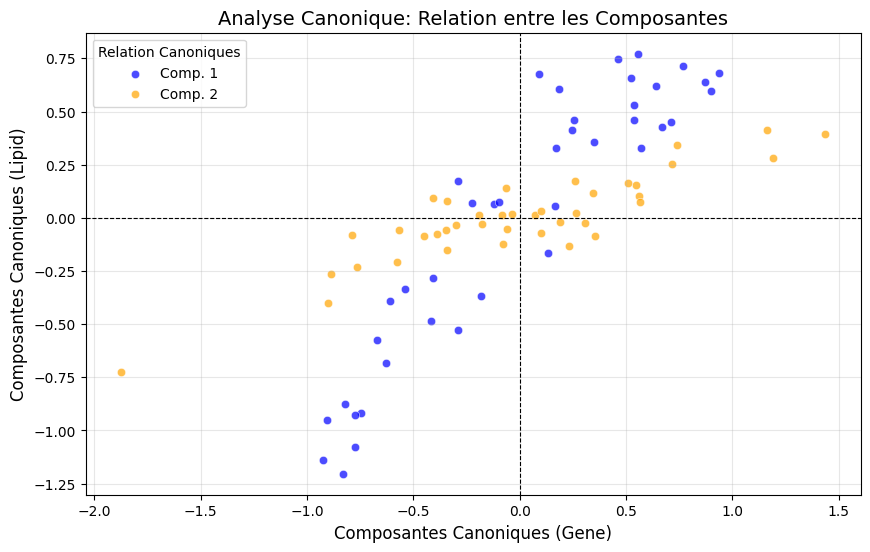

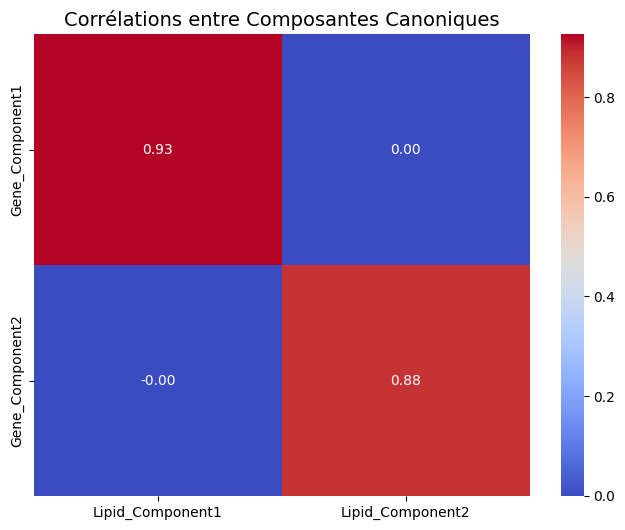

In [29]:
# a) Graphique de dispersion pour visualiser la relation entre les composantes canoniques
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_c[:, 0], y=Y_c[:, 0], label="Comp. 1", color="blue", alpha=0.7)
sns.scatterplot(x=X_c[:, 1], y=Y_c[:, 1], label="Comp. 2", color="orange", alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.axvline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Analyse Canonique: Relation entre les Composantes", fontsize=14)
plt.xlabel("Composantes Canoniques (Gene)", fontsize=12)
plt.ylabel("Composantes Canoniques (Lipid)", fontsize=12)
plt.legend(title="Relation Canoniques")
plt.grid(alpha=0.3)
plt.show()

# b) Matrice de corrélation entre les composantes canoniques
correlation_matrix = pd.DataFrame(correlations, 
                                  columns=["Lipid_Component1", "Lipid_Component2"], 
                                  index=["Gene_Component1", "Gene_Component2"])
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", cbar=True, fmt=".2f")
plt.title("Corrélations entre Composantes Canoniques", fontsize=14)
plt.show()

In [30]:
X_ = pd.read_csv("gene_components.csv")
X_.head()

,Gene_Component1,Gene_Component2
0,0.898466,0.351877
1,0.459744,-0.569982
2,0.868819,0.188058
3,0.168774,0.264108
4,0.521895,-0.408368
